In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('lecture_03_data.csv',
                names = ['age',
                         'workclass',
                         'fnlwgt',
                         'education',
                         'education-num',
                         'marital-status',
                         'occupation',
                         'relationship',
                         'race',
                         'sex',
                         'capital-gain',
                         'capital-loss',
                         'hours-per-week',
                         'native-country',
                         'income'])

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
num_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
target = 'income'

In [6]:
# Let's make our train-test split

In [7]:
X = df[num_vars + cat_vars]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [8]:
# Check for missing data:

In [9]:
for col_name in X_train.columns:
    print('Column ', col_name, ' has: ', X_train[col_name].isna().sum(), ' missing values.')

Column  age  has:  0  missing values.
Column  fnlwgt  has:  0  missing values.
Column  education-num  has:  0  missing values.
Column  capital-gain  has:  0  missing values.
Column  capital-loss  has:  0  missing values.
Column  hours-per-week  has:  0  missing values.
Column  workclass  has:  0  missing values.
Column  education  has:  0  missing values.
Column  marital-status  has:  0  missing values.
Column  occupation  has:  0  missing values.
Column  relationship  has:  0  missing values.
Column  race  has:  0  missing values.
Column  sex  has:  0  missing values.
Column  native-country  has:  0  missing values.


Hooray! No missing data :)

In [10]:
# Explore categorical data:

In [11]:
for cat_col_name in cat_vars:
    print(X_train[cat_col_name].value_counts())

 Private             18158
 Self-emp-not-inc     2032
 Local-gov            1682
 ?                    1462
 State-gov            1034
 Self-emp-inc          891
 Federal-gov           770
 Without-pay            13
 Never-worked            6
Name: workclass, dtype: int64
 HS-grad         8436
 Some-college    5851
 Bachelors       4249
 Masters         1370
 Assoc-voc       1104
 11th             959
 Assoc-acdm       861
 10th             740
 7th-8th          505
 Prof-school      436
 9th              399
 12th             355
 Doctorate        345
 5th-6th          257
 1st-4th          137
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       11958
 Never-married             8527
 Divorced                  3589
 Separated                  820
 Widowed                    799
 Married-spouse-absent      333
 Married-AF-spouse           22
Name: marital-status, dtype: int64
 Craft-repair         3284
 Prof-specialty       3279
 Exec-managerial      3229
 Adm-

The `native-country` column seems to present the biggest issue let's roll all countries other than United Statues into a single category 'Other'

In [12]:
X_train['native-country'] = pd.Series(['United-States' if x==' United-States' else 'Non-US' for x in X_train['native-country']])

In [13]:
X_train['native-country'].value_counts()

United-States    18634
Non-US            2175
Name: native-country, dtype: int64

### Exercise:
I replaced our original data with a new (and improved?) version. Where is the old data? Was this a good idea?

In [14]:
# Explore numeric data

In [15]:
X_train[num_vars].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.593174,1.894822e+05,10.076935,1080.185504,89.173142,40.441454
std,13.653757,1.053041e+05,2.564347,7430.465076,407.216336,12.345814
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176740e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779035e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.367048e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


A few interesting things here:
1. Age seems reasonable from a data quality perspective, and seems to scew young.
2. Who knows what fnlwgt means?
3. Education-num is interesting seemingly sparsely populated at the ends (especially the low end).
4. Capital gain is almost always 0 it seems, but with some very large values. It seems that some rounding has occurred (99999.0 seems like a ceiling). Maybe more natural as a binary.
5. Capital-loss is similar to capital gain but doesn't have the high values that look rounded.
6. Hours per week: A little bit odd, seems like there's some weird behavior where lots of people work 40-45 hours, and then you have some "part time" folks, and some people that work quite a bit more - probably capped at 99. Probably would benefit from breaking into a 3-level categorical.

I won't deal with any of these, but feel free to explore on your own!

In [16]:
#Let's now one-hot-encode our categoricals
X_train_dummied = pd.get_dummies(X_train, columns=cat_vars)

In [17]:
X_train_dummied.transpose().head(100)

,31674,19303,5535,8693,14777,27748,6020,15961,5195,31949,...,29065,23346,16840,11863,31080,22401,17093,27063,8366,17530
age,51,31,25,45,27,40,57,47,43,47,...,28,29,17,22,32,40,36,38,62,38
fnlwgt,289436,200246,49092,226246,267989,252392,190554,198660,115603,197038,...,33798,144808,108909,110677,194740,406463,152307,298841,121319,220783
education-num,13,5,13,9,10,3,6,13,10,13,...,11,10,9,10,13,14,9,9,13,9
capital-gain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3103,0
capital-loss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1902,0,0,0,0,0
hours-per-week,60,40,40,50,40,40,60,40,40,50,...,40,40,20,40,40,40,40,40,40,20
workclass_ ?,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
workclass_ Federal-gov,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
workclass_ Local-gov,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
workclass_ Never-worked,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#okay! Looking pretty good - ready to fit our model . . . but first, let's do these tranformations to our test set.

In [19]:
# recode the native-country column
X_test['native-country'] = pd.Series(['United-States' if x==' United-States' else 'Non-US' for x in X_test['native-country']])
# one hot encode the cats
X_test_dummied = pd.get_dummies(X_test, columns=cat_vars)

In [20]:
y_train_numeric = y_train.replace({' <=50K': 0, ' >50K': 1})
y_test_numeric = y_test.replace({' <=50K': 0, ' >50K': 1})

In [21]:
log_reg = LogisticRegression(random_state=4)

In [22]:
log_reg.fit(X_train_dummied, y_train_numeric)

LogisticRegression(random_state=4)

In [23]:
preds = log_reg.predict_proba(X_test_dummied)

In [24]:
roc_auc_score(y_test_numeric, preds[:,1])

0.5688196535250225

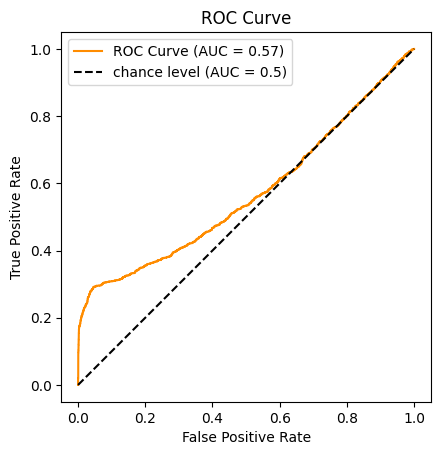

In [25]:
RocCurveDisplay.from_predictions(
    y_test_numeric,
    preds[:, 1],
    name='ROC Curve',
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [26]:
confusion_matrix(y_test_numeric, pd.Series([1 if x > 0.7 else 0 for x in preds[:,1]]))

array([[4946,   26],
       [1267,  274]])

Not a great model! It does seem to be maybe useful if you need a (mostly) reliable way to identify a small persentage of high earners (<= 30%).